# Прихотливая (Fancy) индексация

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Доступ к элементам с заданными индексами:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

Альтернатива - это список или массив индексов:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Размерность результата - это размерность массива индексов:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy индексация работает и в случае многомерных массивов:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Первый массив - это индексы строк, второй - индексы колонок:

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Правила транслирования работают и для индексации:

In [7]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [8]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Комбинированная индексация

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Комбинируем обычный и fancy индекс:

In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

Комбинируем срез и fancy индекс:

In [11]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Мы можем комбинировать fancy индекс и маску: 

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Частое применение - выборка случайных подмножеств из матриц

In [13]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

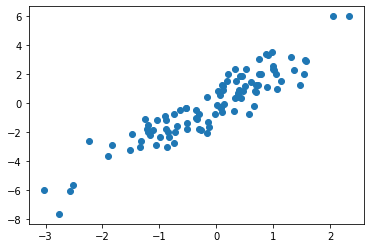

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]);

Возьмем 20 случайных точек:

In [15]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([83, 34, 29, 45, 24, 37, 54, 58,  7,  6, 93, 73, 19, 71, 57,  8, 16,
       92,  2,  4])

In [16]:
selection = X[indices]
selection.shape

(20, 2)

Посмотрим какие точки были выбраны:

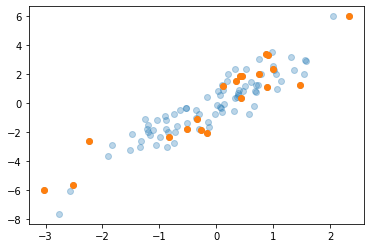

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1]);

Такой подход используется разделения выборки на обучающую и проверочную

## Изменение значений при Fancy индексации

In [18]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


А можем и уменьшить:

In [19]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Но результат может быть нетривиальным:

In [20]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Куда пропала четверка? Первое присваивание ``x[0] = 4``, Второе ``x[0] = 6``.

In [21]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Исходное значение запоминается. 
Если необходимо другое поведение, то используйте at():

In [22]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Пример: Привязывание данных

Давайте создадим гистограмму вручную:

In [23]:
np.random.seed(1)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)

counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)
counts, bins

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  2.,  9., 24., 23., 17., 14.,
         6.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

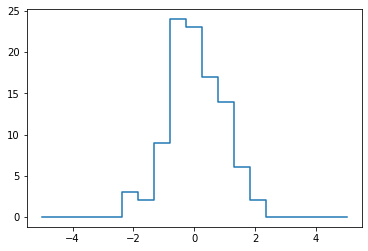

In [24]:
plt.plot(bins, counts, drawstyle='steps');

In [25]:
print("NumPy гистограмма:")
%timeit counts, edges = np.histogram(x, bins)

counts = np.zeros_like(bins)
print("Наша гистограмма:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy гистограмма:
9.97 µs ± 95.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Наша гистограмма:
9.51 µs ± 26.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
